
<div class="alert alert-info" role="alert">
  <center><u><b><h1>Исследование объявлений о продаже квартир</h1></b></u></center>
</div>


<div class="alert alert-info" role="alert">
<p><h5>Дано: данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. 
    
<br>Найти: предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.</h5></p>
</div>

# Содержание
1. [Описание данных](#Описание_данных)
2. [Изучение общей информации](#Изучение_общей_информации)
3. [Предобработка данных](#Предобработка_данных)
4. [Добавление новых столбцов в таблицу](#Добавление_новых_столбцов_в_таблицу) 
5. [Исследовательский анализ данных](#Исследовательский_анализ_данных)
6. [Общий вывод](#Общий_вывод)


<div class="alert alert-info" role="alert"><a name="Описание_данных"><h3>Описание данных</h3></a></div>
<ul>
 <li>airports_nearest — расстояние до ближайшего аэропорта в метрах (м)</li>
 <li>balcony — число балконов</li>
 <li>ceiling_height — высота потолков (м)</li>
 <li>cityCenters_nearest — расстояние до центра города (м)</li>
 <li>days_exposition — сколько дней было размещено объявление (от публикации до снятия)</li>
 <li>first_day_exposition — дата публикации</li>
 <li>floor — этаж</li>
 <li>floors_total — всего этажей в доме</li>
 <li>is_apartment — апартаменты (булев тип)</li>
 <li>kitchen_area — площадь кухни в квадратных метрах (м²)</li>
 <li>last_price — цена на момент снятия с публикации</li>
 <li>living_area — жилая площадь в квадратных метрах (м²)</li>
 <li>locality_name — название населённого пункта</li>
 <li>open_plan — свободная планировка (булев тип)</li>
 <li>parks_around3000 — число парков в радиусе 3 км</li>
 <li>parks_nearest — расстояние до ближайшего парка (м)</li>
 <li>ponds_around3000 — число водоёмов в радиусе 3 км</li>
 <li>ponds_nearest — расстояние до ближайшего водоёма (м)</li>
 <li>rooms — число комнат</li>
 <li>studio — квартира-студия (булев тип)</li>
 <li>total_area — общая площадь квартиры в квадратных метрах (м²)</li>
 <li>total_images — число фотографий квартиры в объявлении</li>
</ul>

<div class="alert alert-info" role="alert"><a name="Изучение_общей_информации"><h3>Изучение общей информации</h3></a></div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
import os

pth1 = '/datasets/real_estate_data.csv'
pth2 = 'real_estate_data.csv'


if os.path.exists(pth1):
    data = pd.read_csv(pth1, sep='\t')
elif os.path.exists(pth2):
    data = pd.read_csv(pth2, sep='\t')
else:
   print('Something is wrong')

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.tail(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23689,13,3550000.0,35.30,2018-02-28T00:00:00,1,2.86,15.0,16.3,4,NaN,...,9.10,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,...,6.00,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,...,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,...,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,NaN,...,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.50,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<div class="alert alert-info" role="alert"><p>
    При просмотре данных обнаружено:
    <br> - большое количество пропущенных значений. 
    <br> - cтолбец "first_day_exposition" должен иметь тип datetime.
    <br> - некорректное название столбцов.   
    <br> - нелогичное объединение данных     
</p></div> 

In [6]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [7]:
data.duplicated().sum()

0

<div class="alert alert-info" role="alert"><p>
  Дубликатов не обнаружено  
</p></div> 

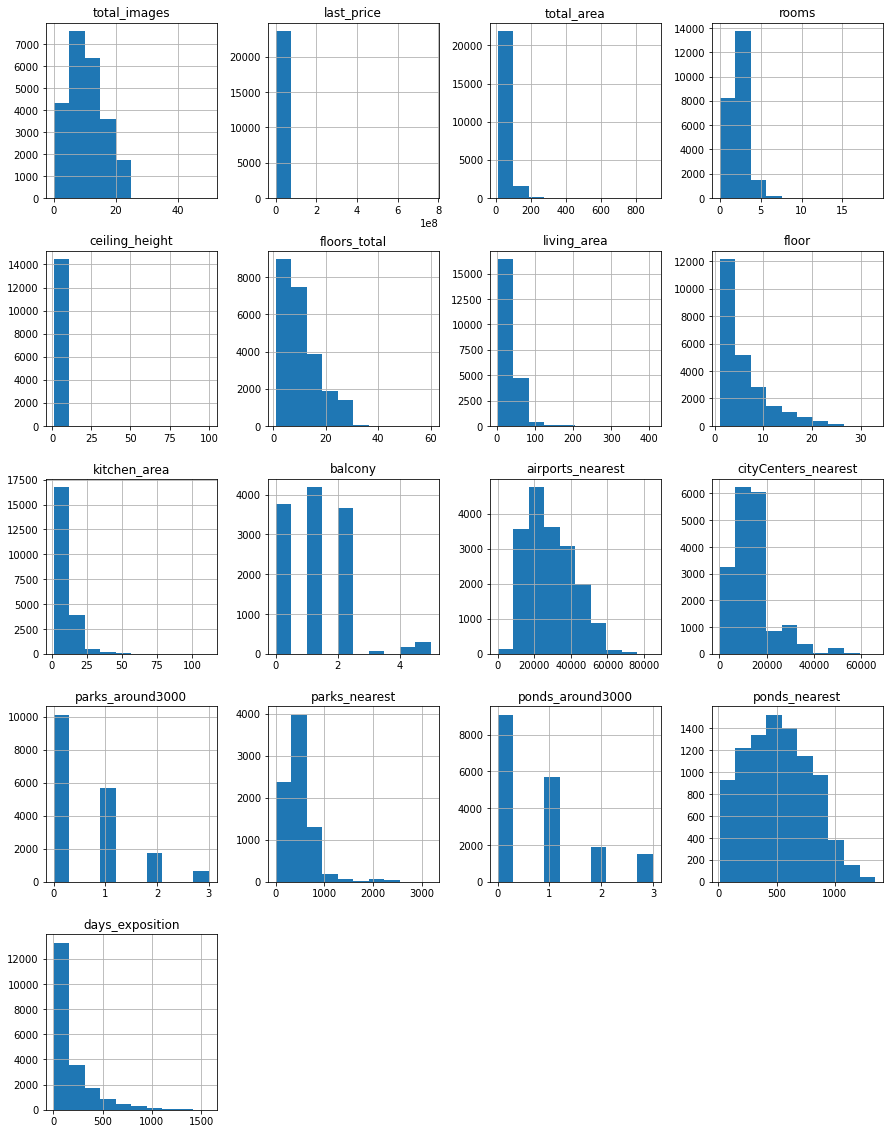

In [8]:
data.hist(figsize=(15, 20));

<div class="alert alert-info" role="alert"><p>
  Построена общая гистограмма для всех числовых столбцов таблицы.   
</p></div> 

<div class="alert alert-info" role="alert"><p>
   <h2>Вывод:</h2>
    <br> При изучении данной таблицы было обнаружено довольно много пропущенных значений и некорректное название столбцов. Возможно, это связано с ошибкой при ручном занесении информации человеком или ленью, либо человек не знает точную высоту потолка квартиры,жилую площадь, площадь кухни, число парков в радиусе 3 км, расстояние до ближайшего парка, число водоёмов в радиусе 3 км и расстояние до ближайшего водоёма. Также смело можем удалить строки без названия населенного пункта (зачем нам информация о квартире, которая расположено не известно где). Пропуски в столбцах "ceiling_height", "is_apartment", "balcony" можно заполнить. В столбце названий населенного пункта наблюдаются повторения. 
</p></div> 


<div class="alert alert-info" role="alert"><a name="Предобработка_данных"><h3>Предобработка данных</h3></a></div>

In [9]:
# переименуем столбцы
data = data.rename(columns={"cityCenters_nearest": "city_centers_nearest", "parks_around3000": "parks_around_3km", "ponds_around3000": "ponds_around_3km", "studio": "is_studio" })

In [11]:
# заменим значения NaN на False
data['is_apartment'] = data['is_apartment'].fillna(False)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  is_studio             23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<div class="alert alert-info" role="alert"><p>
  Столбцы "balcony","is_apartment" заполнены.   
</p></div>

In [13]:
coef_living_area = data['total_area'].mean()/data['living_area'].mean()

In [14]:
# заменим значения NaN в столбце living_area
data['living_area'] = data['living_area'].fillna(data['total_area']/coef_living_area)

In [15]:
data['living_area'].isna().sum()

0

In [16]:
#удалим строки, где отсутствуют значения в столбце "locality_name" 
data = data.dropna(subset=['locality_name'])

In [17]:
len(data['locality_name'].unique())

364

In [18]:
#в столбце "locality_name" заменим ё на е
data['locality_name'] = data['locality_name'].str.replace('ё', 'е', regex=True)

In [19]:
#в столбце "locality_name" поработаем над неявными дубликатами
def replace_wrong_values(wrong_values, correct_value): 
    for wrong_value in wrong_values:
        data['locality_name'] = data['locality_name'].replace(wrong_value, correct_value) 

        
replace_wrong_values(['Мурино'],'поселок Мурино') 
replace_wrong_values(['Кудрово'] ,'деревня Кудрово')
replace_wrong_values(['Коммунар']  ,'поселок Коммунары')
replace_wrong_values(['деревня Федоровское'], 'городской поселок Федоровское')
replace_wrong_values(['Кингисепп'] , 'поселок Кингисеппский')
replace_wrong_values(['Никольское'], 'село Никольское')
replace_wrong_values(['городской поселок Рощино'] , 'поселок городского типа Рощино')
replace_wrong_values(['городской поселок Советский'] , 'поселок городского типа Советский')
replace_wrong_values(['Любань'],  'поселок Любань')
replace_wrong_values(['деревня Зимитицы'], 'поселок Зимитицы')
replace_wrong_values(['коттеджный поселок Лесное'] ,'поселок Лесное')
replace_wrong_values(['поселок станции Громово'], 'поселок Громово')
replace_wrong_values(['деревня Рабитицы'], 'поселок Рабитицы')
replace_wrong_values(['городской поселок Назия'], 'поселок городского типа Назия')
replace_wrong_values(['поселок Рябово'] , 'поселок городского типа Рябово')
replace_wrong_values(['городской поселок Лесогорский'] , 'поселок городского типа Лесогорский')
replace_wrong_values(['поселок при железнодорожной станции Вещево'] , 'поселок станции Вещево')
replace_wrong_values(['деревня Калитино'], 'поселок Калитино')
replace_wrong_values(['садовое товарищество Приладожский']  , 'поселок городского типа Приладожский')
replace_wrong_values(['деревня Щеглово'], 'поселок Щеглово')
replace_wrong_values(['поселок при железнодорожной станции Приветнинское'] , 'поселок станции Приветнинское')
replace_wrong_values(['деревня Зимитицы'], 'поселок Зимитицы')


In [20]:
len(data['locality_name'].unique())

309

In [21]:
#обработаем аномалии в столбце"ceiling_height"
data['ceiling_height'] = np.where(data['ceiling_height'] > 20, data['ceiling_height'] / 10, data['ceiling_height'])

In [22]:
# Заменим тип данных в столбце "first_day_exposition"
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S")

In [23]:
#проверка внесенных изменений
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        14490 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  is_studio             23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          21381 non-null  float64       
 13  balcony         

In [24]:
data = data.query('ceiling_height != 2 and ceiling_height != 1.2 and ceiling_height != 1 and ceiling_height != 2.3 and ceiling_height != 2.34 and ceiling_height != 2.2 and ceiling_height != 2.25 and ceiling_height != 2.26 and ceiling_height != 1.75 and last_price != 12190')
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.600000,1,False,...,11.00,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.300000,4,False,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,90.785766,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000000,13,False,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.300000,3,False,...,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.000000,4,False,...,8.50,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.700000,1,False,...,NaN,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,43.822689,12,False,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [25]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
count,23628.000000,2.362800e+04,23628.000000,23628.000000,14468.000000,23543.000000,23628.000000,23628.000000,21362.00000,23628.000000,18109.000000,18132.000000,18133.000000,8059.000000,18133.000000,9080.000000,20451.000000
mean,9.864314,6.544497e+06,60.338851,2.070256,2.731661,10.677101,34.587394,5.893770,10.56756,0.591798,28801.382020,14197.539212,0.611482,490.803325,0.769536,518.125220,180.814386
std,5.682001,1.090067e+07,35.672416,1.078840,0.349282,6.592658,22.366071,4.882838,5.89973,0.959851,12638.176427,8607.604874,0.802045,342.634452,0.937899,277.806702,219.846305
min,0.000000,4.300000e+05,12.000000,0.000000,2.260000,1.000000,2.000000,1.000000,1.30000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.414500e+06,40.000000,1.000000,2.520000,5.000000,19.000000,2.000000,7.00000,0.000000,18574.000000,9241.000000,0.000000,287.500000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.10000,0.000000,26755.000000,13105.000000,0.000000,454.000000,1.000000,502.500000,95.000000
75%,14.000000,6.800000e+06,69.762500,3.000000,2.800000,16.000000,42.100000,8.000000,12.00000,1.000000,37294.000000,16293.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,20.000000,60.000000,409.700000,33.000000,112.00000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


<div class="alert alert-info" role="alert"><p><h2> Вывод:</h2>
<br> При предобработке данных были заполнены столбцы "balcony","is_apartment", "living_area". В таблице были удалены строки, где отсутствовали название населенных пунктов. Также устранили неявные дубликаты названий населенных пунктов и выбивающиеся значения в столбце "ceiling_height". В таблице удалили данные квартир с низкими потолками, т.к. с в этих квартирах людям будет не комфортно. Также удалена строка с самой низкой стоимостью квартиры, т.к. это не соответствует действительности.  Заменили тип данных в столбце "first_day_exposition".</p></div> 

<div class="alert alert-info" role="alert"><a name="Добавление_новых_столбцов_в_таблицу"><h3>Добавление новых столбцов в таблицу</h3></a></div>


In [26]:
# Добавим цену квадратного метра
data['price_per_meter'] = data['last_price'] / data['total_area']
data['price_per_meter'] = data['price_per_meter'].round(decimals=2)

In [27]:
# Добавим день, месяц и год публикации
data['day_of_week_exposition'] = data['first_day_exposition'].dt.day_name()
data['month_exposition'] = data['first_day_exposition'].dt.month_name()
data['year_exposition'] = data['first_day_exposition'].dt.year

In [28]:
def floor_status(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'


In [29]:
# Добавим тип этажа квартиры
data['floor_status'] = data.apply(floor_status, axis=1)

In [30]:
#Расстояние до ближайшего аэропорта и центра города переведем из м в км и округлим до целых значений
data['airports_nearest_km'] = (data['airports_nearest']/1000).round()
data['city_centers_nearest_km'] = (data['city_centers_nearest']/1000).round()

In [31]:
del data['airports_nearest']
del data['city_centers_nearest']

In [32]:
#проверим внесенные изменения
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3km,ponds_nearest,days_exposition,price_per_meter,day_of_week_exposition,month_exposition,year_exposition,floor_status,airports_nearest_km,city_centers_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,2.0,755.0,NaN,120370.37,Thursday,March,2019,другой,19.0,16.0
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.600000,1,False,...,0.0,NaN,81.0,82920.79,Tuesday,December,2018,первый,13.0,19.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.300000,4,False,...,2.0,574.0,558.0,92785.71,Thursday,August,2015,другой,22.0,14.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,90.785766,9,False,...,3.0,234.0,424.0,408176.10,Friday,July,2015,другой,28.0,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,1.0,48.0,121.0,100000.00,Tuesday,June,2018,другой,32.0,8.0


<div class="alert alert-info" role="alert"><p><h2>Вывод:</h2>
<br> В данные добавлены новые столбцы: цена квадратного метра, тип этажа квартиры, день, месяц и год публикации, расстояние до ближайшего аэропорта и центра города в км. В таблице были удалены столбцы, где были указаны расстояния до ближайшего аэропорта и центра города переведем в метрах. </p></div> 

<div class="alert alert-info" role="alert"><a name="Исследовательский_анализ_данных"><h3>Исследовательский анализ данных</h3></a></div>

<div class="alert alert-info" role="alert"><p>
Изучим общую площадь квартир</p></div> 

In [33]:
data['total_area'].describe()

count    23628.000000
mean        60.338851
std         35.672416
min         12.000000
25%         40.000000
50%         52.000000
75%         69.762500
max        900.000000
Name: total_area, dtype: float64

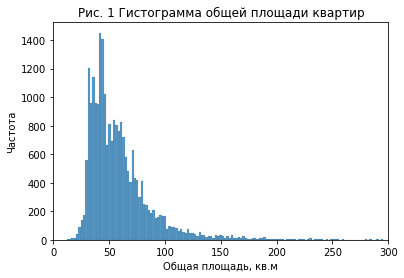

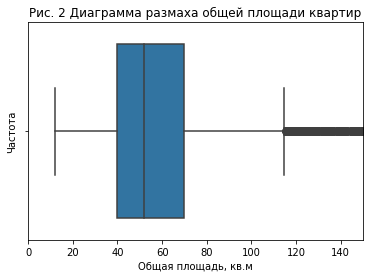

In [34]:
sns.histplot(data['total_area'])
plt.xlim(0, 300)
plt.title('Рис. 1 Гистограмма общей площади квартир')
plt.xlabel('Общая площадь, кв.м')
plt.ylabel('Частота')
plt.show()
sns.boxplot(x=data['total_area']).set_xlim([0, 200]) 
plt.xlim(0, 150)
plt.title('Рис. 2 Диаграмма размаха общей площади квартир')
plt.xlabel('Общая площадь, кв.м')
plt.ylabel('Частота')
plt.show()

<div class="alert alert-info" role="alert"><p>
Общая площадь в нашей выборке колеблется от 12 до 900 кв.м., среднее значение 60 кв.м., а медиана 52 кв.м. Распределение данных нормальное, есть выбросы, но они не сильно влияют на данные</p></div> 

<p>
<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

    
👍</div>

<div class="alert alert-info" role="alert"><p>
Изучим жилую площадь квартир</p></div> 

In [35]:
data['living_area'].describe()

count    23628.000000
mean        34.587394
std         22.366071
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

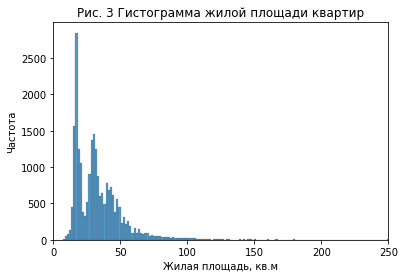

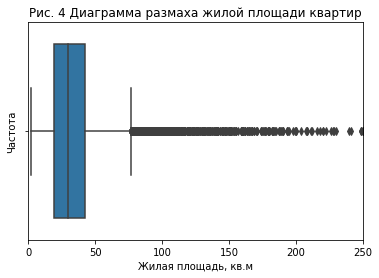

In [36]:
sns.histplot(data['living_area'])
plt.xlim(0, 250)
plt.title('Рис. 3 Гистограмма жилой площади квартир')
plt.xlabel('Жилая площадь, кв.м')
plt.ylabel('Частота')
plt.show()
sns.boxplot(x=data['living_area']).set_xlim([0, 200]) 
plt.xlim(0, 250)
plt.title('Рис. 4 Диаграмма размаха жилой площади квартир')
plt.xlabel('Жилая площадь, кв.м')
plt.ylabel('Частота')
plt.show()

<div class="alert alert-info" role="alert"><p>
Жилая площадь варируется от 2 до 409 кв.м., среднее значение 34 кв.м., а медиана 30 кв.м. Распределение данных нормальное, также наблюдаются выбросы, но они не сильно влияют на данные</p></div> 

<div class="alert alert-info" role="alert"><p>
Изучим площадь кухни</p></div>

In [37]:
data['kitchen_area'].describe()

count    21362.00000
mean        10.56756
std          5.89973
min          1.30000
25%          7.00000
50%          9.10000
75%         12.00000
max        112.00000
Name: kitchen_area, dtype: float64

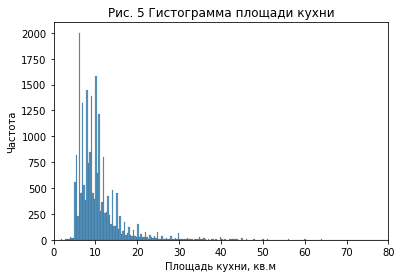

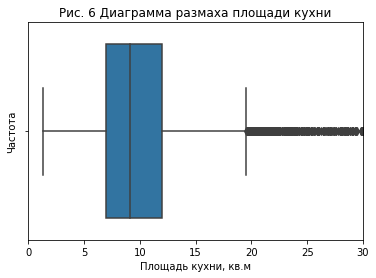

In [38]:
sns.histplot(data['kitchen_area'])
plt.xlim(0, 80)
plt.title('Рис. 5 Гистограмма площади кухни')
plt.xlabel('Площадь кухни, кв.м')
plt.ylabel('Частота')
plt.show()
sns.boxplot(x=data['kitchen_area']).set_xlim([0, 200]) 
plt.xlim(0, 30)
plt.title('Рис. 6 Диаграмма размаха площади кухни')
plt.xlabel('Площадь кухни, кв.м')
plt.ylabel('Частота')
plt.show()

<div class="alert alert-info" role="alert"><p>
Площадь кухни встречается от 1 до 112 кв.м., среднее значение 10 кв.м., а медиана 9 кв.м. Распределение данных нормальное, наблюдаются выбросы, но они не сильно влияют на данные</p></div> 

<div class="alert alert-info" role="alert"><p>
Изучим цену объекта</p></div>

In [39]:
data['last_price'].describe()

count    2.362800e+04
mean     6.544497e+06
std      1.090067e+07
min      4.300000e+05
25%      3.414500e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

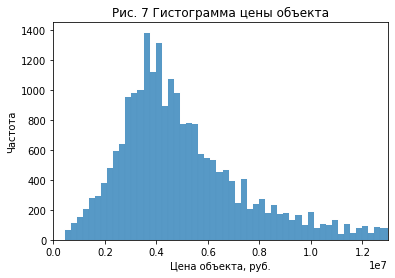

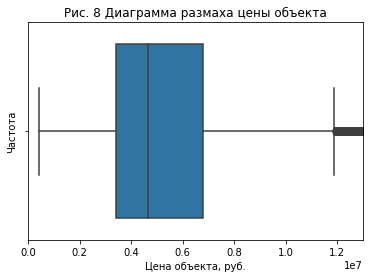

In [40]:
sns.histplot(data['last_price'])
plt.xlim(0, 13000000)
plt.title('Рис. 7 Гистограмма цены объекта')
plt.xlabel('Цена объекта, руб.')
plt.ylabel('Частота')
plt.show()
sns.boxplot(x=data['last_price']).set_xlim([0, 200]) 
plt.xlim(0, 13000000)
plt.title('Рис. 8 Диаграмма размаха цены объекта')
plt.xlabel('Цена объекта, руб.')
plt.ylabel('Частота')
plt.show()

<div class="alert alert-info" role="alert"><p>
Цена квартиры изменяется от 12190 до 763000000, среднее значение 6541126, а медиана 4650000. Распределение данных нормальное, наблюдаются выбросы, но они не сильно влияют на данные</p></div> 

<div class="alert alert-info" role="alert"><p>
Изучим количество комнат</p></div>

In [41]:
data['rooms'].describe()

count    23628.000000
mean         2.070256
std          1.078840
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

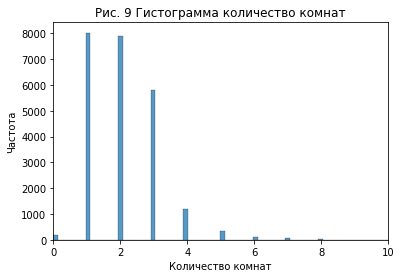

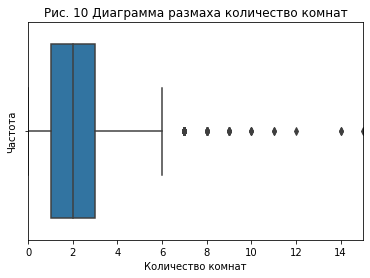

In [42]:
sns.histplot(data['rooms'])
plt.xlim(0, 10)
plt.title('Рис. 9 Гистограмма количество комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Частота')
plt.show()
sns.boxplot(x=data['rooms']) 
plt.xlim(0, 15)
plt.title('Рис. 10 Диаграмма размаха количество комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Частота')
plt.show()

<div class="alert alert-info" role="alert"><p>
Максимальное количество комнат в квартире равно 19. Среднее значение и медиана равна 2. Распределение данных нормальное, наблюдаются выбросы, но они не сильно влияют на данные</p></div> 

<div class="alert alert-info" role="alert"><p>
Изучим высоту потолков</p></div>

In [43]:
data['ceiling_height'].describe()

count    14468.000000
mean         2.731661
std          0.349282
min          2.260000
25%          2.520000
50%          2.650000
75%          2.800000
max         20.000000
Name: ceiling_height, dtype: float64

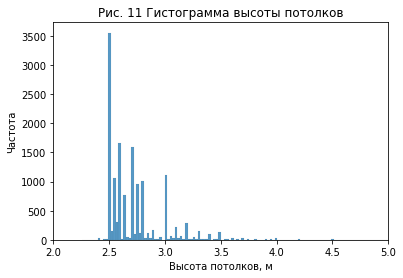

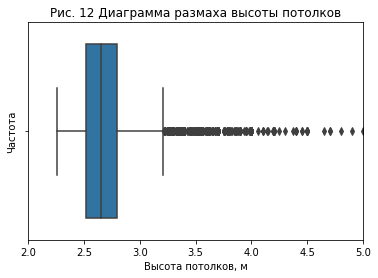

In [44]:
sns.histplot(data['ceiling_height'])
plt.xlim(2, 5)
plt.title('Рис. 11 Гистограмма высоты потолков')
plt.xlabel('Высота потолков, м')
plt.ylabel('Частота')
plt.show()
sns.boxplot(x=data['ceiling_height']) 
plt.xlim(2,5)
plt.title('Рис. 12 Диаграмма размаха высоты потолков')
plt.xlabel('Высота потолков, м')
plt.ylabel('Частота')
plt.show()

<div class="alert alert-info" role="alert"><p>
Высота потолков достигает 20 м. Среднее значение и медиана равна 2.7 м. Распределение данных нормальное, наблюдаются выбросы, но они не сильно влияют на данные</p></div> 

<div class="alert alert-info" role="alert"><p>
Изучим этаж квартиры</p></div>

In [45]:
data['floor'].describe()

count    23628.000000
mean         5.893770
std          4.882838
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

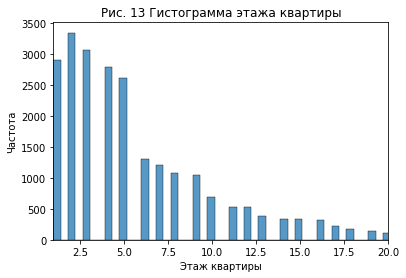

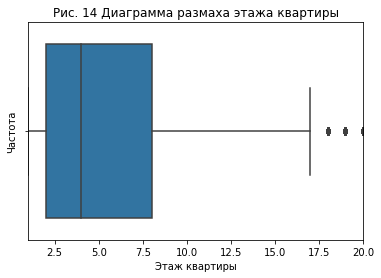

In [46]:
sns.histplot(data['floor'])
plt.xlim(1, 20)
plt.title('Рис. 13 Гистограмма этажа квартиры')
plt.xlabel('Этаж квартиры')
plt.ylabel('Частота')
plt.show()
sns.boxplot(x=data['floor']) 
plt.xlim(1, 20)
plt.title('Рис. 14 Диаграмма размаха этажа квартиры')
plt.xlabel('Этаж квартиры')
plt.ylabel('Частота')
plt.show()

<div class="alert alert-info" role="alert"><p>
Максимальный этаж квартиры равняется 33. Среднее значение равно 5, а медиана равна 4. Распределение данных нормальное, наблюдаются выбросы, но они не сильно влияют на данные</p></div> 

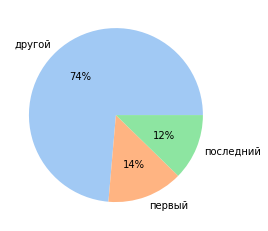

In [47]:
counts = [i for i in data['floor_status'].value_counts()]
status = [i for i in data['floor_status'].unique()]

colors = sns.color_palette('pastel')[ 0:7 ]


plt.pie(counts, labels = status, colors = colors, autopct='%.0f%%')
plt.show()

<div class="alert alert-info" role="alert"><p>
Больше всего квартир продают не на первом и последних этажах. Меньше всего продают квартир на последнем этаже.</p></div> 

<div class="alert alert-info" role="alert"><p>
Изучим количество этажей в доме</p></div>

In [48]:
data['year_exposition'].value_counts()

2018    8501
2017    8179
2019    2877
2016    2762
2015    1173
2014     136
Name: year_exposition, dtype: int64

In [49]:
data['floors_total'].describe()

count    23543.000000
mean        10.677101
std          6.592658
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

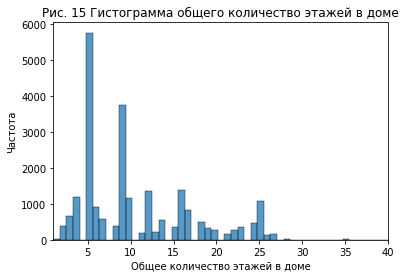

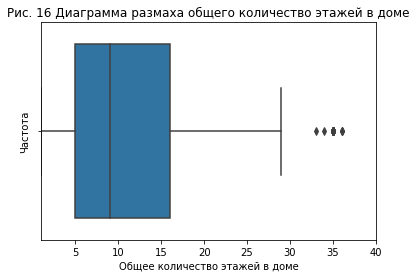

In [50]:
sns.histplot(data['floors_total'])
plt.xlim(1, 40)
plt.title('Рис. 15 Гистограмма общего количество этажей в доме')
plt.xlabel('Общее количество этажей в доме')
plt.ylabel('Частота')
plt.show()
sns.boxplot(x=data['floors_total']) 
plt.xlim(1, 40)
plt.title('Рис. 16 Диаграмма размаха общего количество этажей в доме')
plt.xlabel('Общее количество этажей в доме')
plt.ylabel('Частота')
plt.show()

<div class="alert alert-info" role="alert"><p> 60-этажный жилой дом является самым высоким жилым домом, выставленным на продажу квартир в Санкт-Петербурге и соседних населённых пунктах с 2014 по 2019 года. Распределение данных нормальное, наблюдаются выбросы, но они не сильно влияют на данные</p></div> 

<div class="alert alert-info" role="alert"><p>
Изучим расстояние до центра города</p></div>

In [51]:
data['city_centers_nearest_km'].describe()

count    18132.000000
mean        14.191264
std          8.615448
min          0.000000
25%          9.000000
50%         13.000000
75%         16.000000
max         66.000000
Name: city_centers_nearest_km, dtype: float64

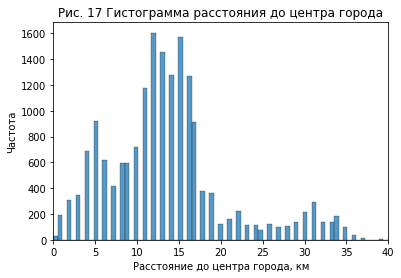

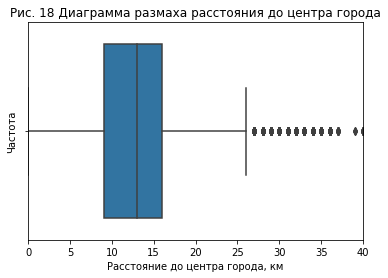

In [52]:
sns.histplot(data['city_centers_nearest_km'])
plt.xlim(0, 40)
plt.title('Рис. 17 Гистограмма расстояния до центра города')
plt.xlabel('Расстояние до центра города, км')
plt.ylabel('Частота')
plt.show()
sns.boxplot(x=data['city_centers_nearest_km']) 
plt.xlim(0, 40)
plt.title('Рис. 18 Диаграмма размаха расстояния до центра города')
plt.xlabel('Расстояние до центра города, км')
plt.ylabel('Частота')
plt.show()

<div class="alert alert-info" role="alert"><p>
Максимальное расстояние до центра города составляет 66 км. Среднее расстояние и медиана равняется 14 км и 13 км соотвественно.   Распределение данных нормальное, наблюдаются выбросы, но они не сильно влияют на данные</p></div> 

<div class="alert alert-info" role="alert"><p>
Изучим расстояние до ближайшего аэропорта</p></div>

In [53]:
data['airports_nearest_km'].describe()

count    18109.000000
mean        28.807444
std         12.640877
min          0.000000
25%         19.000000
50%         27.000000
75%         37.000000
max         85.000000
Name: airports_nearest_km, dtype: float64

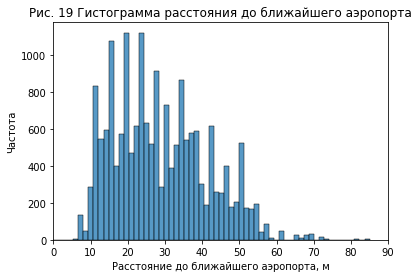

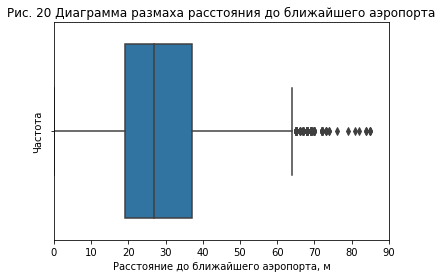

In [54]:
sns.histplot(data['airports_nearest_km'])
plt.xlim(0, 90)
plt.title('Рис. 19 Гистограмма расстояния до ближайшего аэропорта')
plt.xlabel('Расстояние до ближайшего аэропорта, м')
plt.ylabel('Частота')
plt.show()
sns.boxplot(x=data['airports_nearest_km']) 
plt.xlim(0, 90)
plt.title('Рис. 20 Диаграмма размаха расстояния до ближайшего аэропорта')
plt.xlabel('Расстояние до ближайшего аэропорта, м')
plt.ylabel('Частота')
plt.show()

<div class="alert alert-info" role="alert"><p>
Максимальное расстояние до ближайшего аэропорта составляет 85 км. Среднее расстояние и медиана равняется 28 км и 27 км соотвественно. Распределение данных нормальное, наблюдаются выбросы, но они не сильно влияют на данные</p></div> 

<div class="alert alert-info" role="alert"><p>
Изучим расстояние до ближайшего парка</p></div>

In [55]:
data['parks_nearest'].describe()

count    8059.000000
mean      490.803325
std       342.634452
min         1.000000
25%       287.500000
50%       454.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

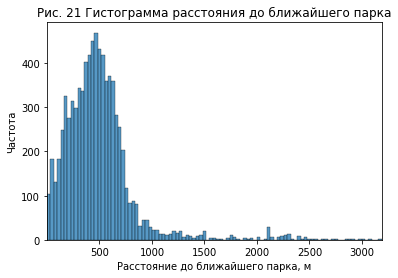

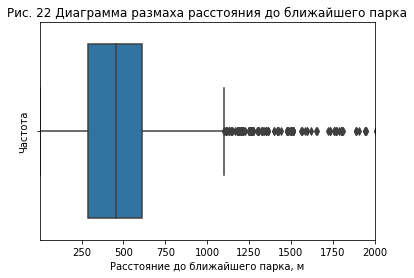

In [56]:
sns.histplot(data['parks_nearest'])
plt.xlim(1, 3190)
plt.title('Рис. 21 Гистограмма расстояния до ближайшего парка')
plt.xlabel('Расстояние до ближайшего парка, м')
plt.ylabel('Частота')
plt.show()
sns.boxplot(x=data['parks_nearest']) 
plt.xlim(1, 2000)
plt.title('Рис. 22 Диаграмма размаха расстояния до ближайшего парка')
plt.xlabel('Расстояние до ближайшего парка, м')
plt.ylabel('Частота')
plt.show()

<div class="alert alert-info" role="alert"><p>
Максимальное расстояние до ближайшего парка составляет 3 км. Среднее расстояние и медиана равняется 490 м и 454 м соотвественно. Распределение данных нормальное, наблюдаются выбросы, но они не сильно влияют на данные</p></div>

<div class="alert alert-info" role="alert"><p>
Изучим день публикации объявления</p></div>

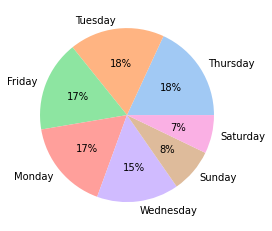

In [57]:
counts = [i for i in data['day_of_week_exposition'].value_counts()]
day_week = [i for i in data['day_of_week_exposition'].unique()]

colors = sns.color_palette('pastel')[ 0:7 ]


plt.pie(counts, labels = day_week, colors = colors, autopct='%.0f%%')
plt.show()

<div class="alert alert-info" role="alert"><p>
Больше всего выкладывают объявления о продаже в будние дни, а особенно во вторник и четверг. В выходные дни выкладывают объявлений меньше.</p></div>

<div class="alert alert-info" role="alert"><p>
Изучим месяц публикации объявления</p></div>

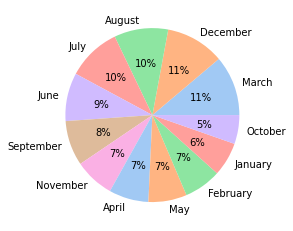

In [58]:
counts = [i for i in data['month_exposition'].value_counts()]
day_week = [i for i in data['month_exposition'].unique()]

colors = sns.color_palette('pastel')[ 0:7 ]


plt.pie(counts, labels = day_week, colors = colors, autopct='%.0f%%')
plt.show()

<div class="alert alert-info" role="alert"><p>
Большинство объявлений о продаже выкладывают в декабре и марте. В январе и октябре наблюдаются меньше объявлений. </p></div>

<div class="alert alert-info" role="alert"><p>
Изучим размещение объявления</p></div>

In [59]:
data['days_exposition'].describe()

count    20451.000000
mean       180.814386
std        219.846305
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

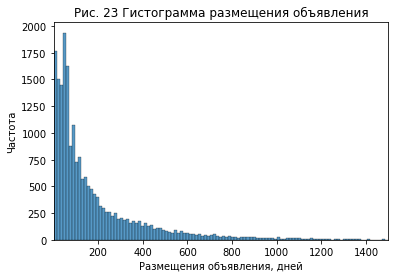

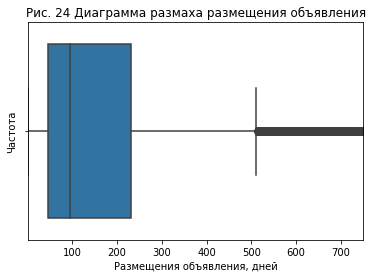

In [60]:
sns.histplot(data['days_exposition'])
plt.xlim(1, 1500)
plt.title('Рис. 23 Гистограмма размещения объявления')
plt.xlabel('Размещения объявления, дней')
plt.ylabel('Частота')
plt.show()
sns.boxplot(x=data['days_exposition']) 
plt.xlim(1, 750)
plt.title('Рис. 24 Диаграмма размаха размещения объявления')
plt.xlabel('Размещения объявления, дней')
plt.ylabel('Частота')
plt.show()

In [61]:
#На практике границами выбросов снизу и сверху обычно берут 5й и 95й (или 1й и 99й) перцентили.
data['days_exposition'].quantile(0.05)

9.0

In [62]:
data['days_exposition'].quantile(0.95)

648.0

<div class="alert alert-info" role="alert"><p>
1580 дней - это максимальное хранение объявления о продаже. Среднее значение и медиана составляет 180 и 95 дней соответственно. Cамыe быстрые продажи до 9 дней. Самые медленные продажи больше 647 дней.
</p></div>

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23628 entries, 0 to 23698
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             23628 non-null  int64         
 1   last_price               23628 non-null  float64       
 2   total_area               23628 non-null  float64       
 3   first_day_exposition     23628 non-null  datetime64[ns]
 4   rooms                    23628 non-null  int64         
 5   ceiling_height           14468 non-null  float64       
 6   floors_total             23543 non-null  float64       
 7   living_area              23628 non-null  float64       
 8   floor                    23628 non-null  int64         
 9   is_apartment             23628 non-null  bool          
 10  is_studio                23628 non-null  bool          
 11  open_plan                23628 non-null  bool          
 12  kitchen_area             21362 n

<div class="alert alert-info" role="alert"><p>
Изучим зависит ли цена от общей площади</p></div>

In [64]:
corr = data[['last_price',\
             'total_area',\
           'living_area',\
           'kitchen_area',\
           'rooms',\
            'year_exposition']].corr().round(2)
corr.style.background_gradient(cmap='coolwarm')

,last_price,total_area,living_area,kitchen_area,rooms,year_exposition
last_price,1.000000,0.650000,0.590000,0.520000,0.360000,-0.040000
total_area,0.650000,1.000000,0.950000,0.610000,0.760000,-0.080000
living_area,0.590000,0.950000,1.000000,0.440000,0.830000,-0.070000
kitchen_area,0.520000,0.610000,0.440000,1.000000,0.270000,-0.060000
rooms,0.360000,0.760000,0.830000,0.270000,1.000000,-0.050000
year_exposition,-0.040000,-0.080000,-0.070000,-0.060000,-0.050000,1.000000


Text(0, 0.5, 'Медианная цена за квартиру')

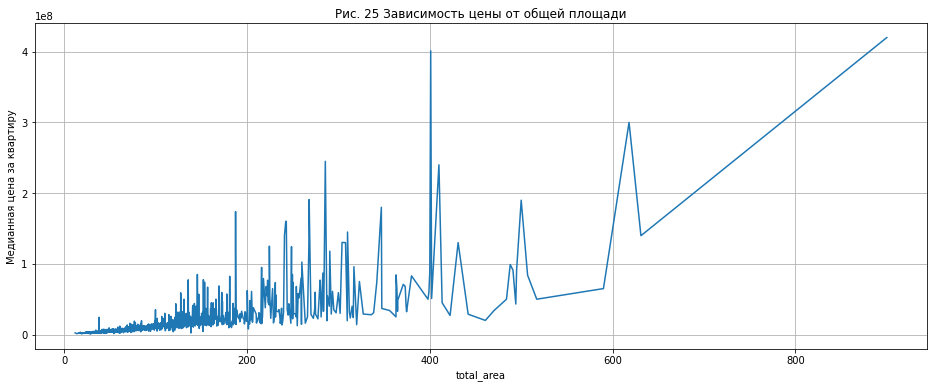

In [65]:
func_4= (data.groupby('total_area').agg({'last_price':'median'})
                    .rename(columns = {'last_price':'Медианная цена за квартиру'}))


plot_1 = func_4['Медианная цена за квартиру'].plot(grid=True, figsize=(16, 6))


plt.title('Рис. 25 Зависимость цены от общей площади')
plt.ylabel('Медианная цена за квартиру')


Text(0, 0.5, 'Медианная цена за квартиру')

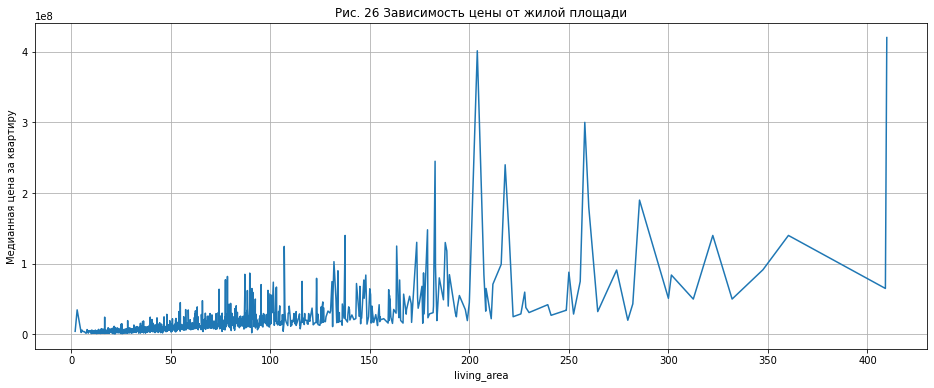

In [66]:
func_5= (data.groupby('living_area').agg({'last_price':'median'})
                    .rename(columns = {'last_price':'Медианная цена за квартиру'}))


plot_2 = func_5['Медианная цена за квартиру'].plot(grid=True, figsize=(16, 6))


plt.title('Рис. 26 Зависимость цены от жилой площади')
plt.ylabel('Медианная цена за квартиру')


Text(0, 0.5, 'Медианная цена за квартиру')

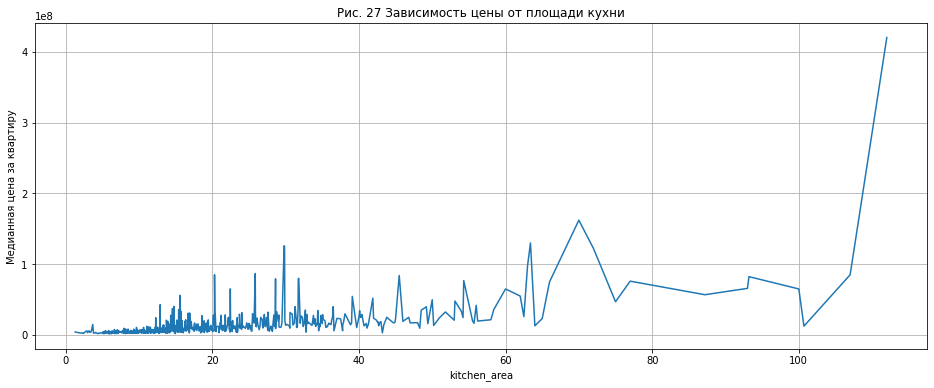

In [67]:
func_6= (data.groupby('kitchen_area').agg({'last_price':'median'})
                    .rename(columns = {'last_price':'Медианная цена за квартиру'}))


plot_3 = func_6['Медианная цена за квартиру'].plot(grid=True, figsize=(16, 6))


plt.title('Рис. 27 Зависимость цены от площади кухни')
plt.ylabel('Медианная цена за квартиру')


Text(0, 0.5, 'Медианная цена за квартиру')

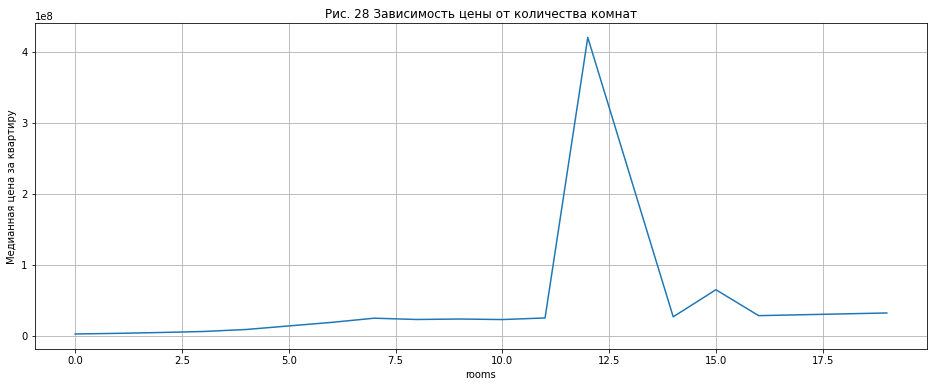

In [68]:
func_7= (data.groupby('rooms').agg({'last_price':'median'})
                    .rename(columns = {'last_price':'Медианная цена за квартиру'}))


plot_ = func_7['Медианная цена за квартиру'].plot(grid=True, figsize=(16, 6))


plt.title('Рис. 28 Зависимость цены от количества комнат')
plt.ylabel('Медианная цена за квартиру')


Text(0, 0.5, 'Медианная цена за квартиру')

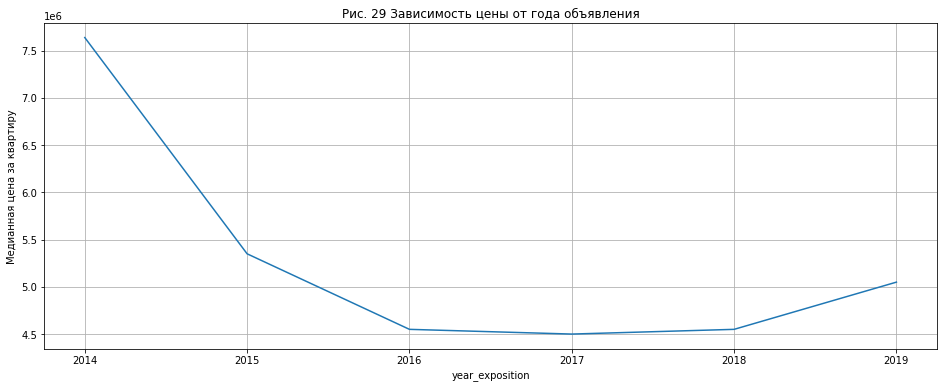

In [69]:
func_8= (data.groupby('year_exposition').agg({'last_price':'median'})
                    .rename(columns = {'last_price':'Медианная цена за квартиру'}))


plot_5 = func_8['Медианная цена за квартиру'].plot(grid=True, figsize=(16, 6))


plt.title('Рис. 29 Зависимость цены от года объявления')
plt.ylabel('Медианная цена за квартиру')


<div class="alert alert-info" role="alert"><p>
На полную стоимость квартиры сильнее всего влияет общая и жилая площадь квартиры, площадь кухни и количество комнат. Ну и отрицательная корреляция между стоимостью квартиры и годом выставления на продажу имеет место быть. Предположу, что на самом деле еще сильнее влияют ожидания и референсы продавца. С 2014 до 2017 года наблюдается спад цен на квартиры, с 2017 до 2019 года н </p></div>

(1.0, 13000000.0)

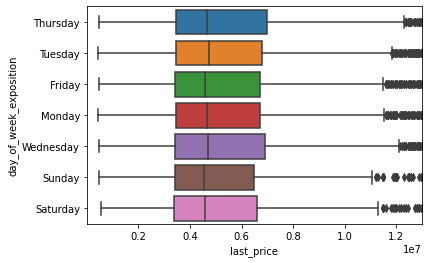

In [70]:
sns.boxplot(data=data, x='last_price', y='day_of_week_exposition')
plt.xlim(1, 13000000)

(1.0, 13000000.0)

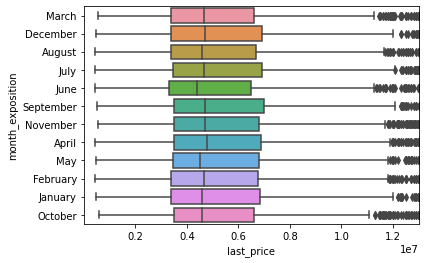

In [71]:
sns.boxplot(data=data, x='last_price', y='month_exposition')
plt.xlim(1, 13000000)

(1.0, 13000000.0)

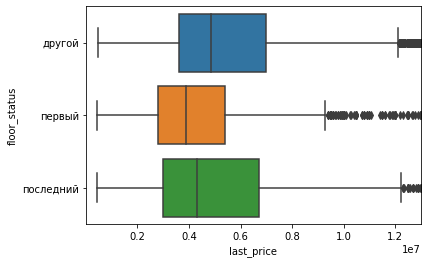

In [72]:
sns.boxplot(data=data, x='last_price', y='floor_status')
plt.xlim(1, 13000000)

<div class="alert alert-info" role="alert"><p>
Никаких подозрительных моментов не наблюдается. Все в пределах динамики экономики с РФ в соответствии с годами. День недели и месяц — безразлично. Однозначно можно сказать, что квартиры на первом этаже стоят дешевле остальных.</p></div>

In [73]:
func_one = (data.groupby(by='locality_name').agg({'first_day_exposition': 'count', 'price_per_meter':'mean'})
.sort_values(by = 'first_day_exposition', ascending=False).head(10))
func_one

,first_day_exposition,price_per_meter
locality_name,,
Санкт-Петербург,15715,114859.104803
поселок Мурино,590,86087.512017
деревня Кудрово,471,95326.179108
поселок Шушары,440,78677.364318
Всеволожск,397,68719.320378
Пушкин,369,103125.819377
Колпино,338,75424.579112
поселок Парголово,327,90175.913089
Гатчина,307,68746.146515


<div class="alert alert-info" role="alert"><p>
Населённым пунктом с наибольшим числом объявлений является Санкт-Петербург (15721 объявлений), также у этого населенного пункта самая дорогая средняя цена за квадратный метр (114849 руб.) . Второе место по дороговизне цены за квадратный метр занимает Пушкин (103125 руб.). Меньше объявлений о продаже квартиры выкладывают в Выборге (237 объявлений), также в Выборге низкая стоимость квадратного метра (58141 руб.).</p></div>

In [74]:
aparts_spb = data.query('locality_name == "Санкт-Петербург"')

In [75]:
func_two = (aparts_spb.groupby('city_centers_nearest_km').agg({'price_per_meter':'median', 'last_price':'median'})
                    .rename(columns = {'price_per_meter':'Медианная цена за метр', 'last_price':'Медианная цена за квартиру' }))

func_two


,Медианная цена за метр,Медианная цена за квартиру
city_centers_nearest_km,,
0.0,172619.050,17900000.0
1.0,128485.110,11395000.0
2.0,123035.515,10000000.0
3.0,108469.115,8409000.0
4.0,117952.265,9200000.0
5.0,127093.280,9500000.0
6.0,131835.225,8900000.0
7.0,127017.080,7800000.0
8.0,122781.990,7445000.0


Text(0, 0.5, 'Медианная цена за квартиру')

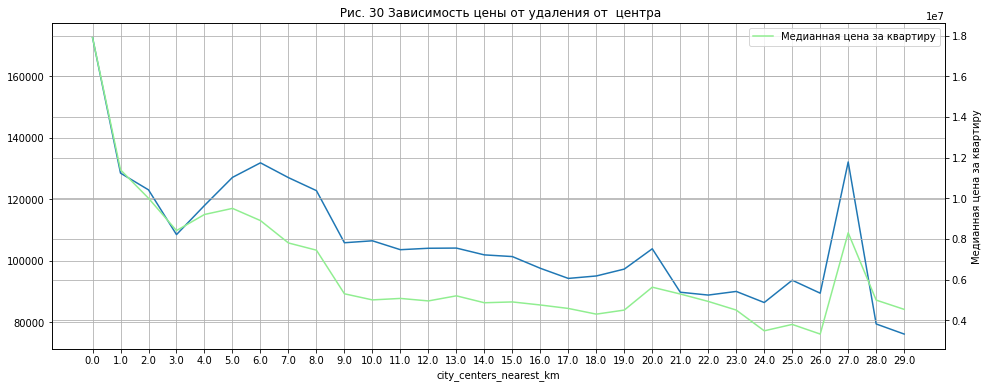

In [76]:
price_m = func_two['Медианная цена за метр'].plot(grid=True, figsize=(16, 6))

func_two['Медианная цена за квартиру'].plot(grid=True, figsize=(16, 6), ax = price_m.twinx(), color='lightgreen')

plt.xticks(func_two.index.values, func_two.index.values)

plt.legend(['Медианная цена за квартиру'])
plt.title(' Рис. 30 Зависимость цены от удаления от  центра')
plt.ylabel('Медианная цена за квартиру')


<div class="alert alert-info" role="alert"><p>
Из графика следует, что чем дальше квартиры от центра Петербурга, тем ниже стоимость. Однако в 27 км от центра цена резко возрастает, скорее всего, там распологаются элитные дома.</p></div>

<div class="alert alert-info" role="alert"><p><h2>Вывод:</h2>
<br> 
    <ul>
     <li>общая площадь в нашей выборке колеблется от 12 до 900 кв.м., среднее значение 60 кв.м., а медиана 52 кв.м.</li>
     <li>жилая площадь варируется от 2 до 409 кв.м., среднее значение 34 кв.м., а медиана 30 кв.м. </li>
     <li>чем дальше квартиры от центра Петербурга, тем ниже стоимость.</li>
     <li>в 27 км от центра цена резко возрастает, скорее всего, там распологаются элитные дома.</li>      
     <li>населённым пунктом с наибольшим числом объявлений является Санкт-Петербург (15721 объявлений), также у этого населенного пункта самая дорогая средняя цена за квадратный метр (114849 руб.).</li>
     <li>второе место по дороговизне цены за квадратный метр занимает Пушкин (103125 руб.).</li>
     <li>меньше объявлений о продаже квартиры выкладывают в Выборге (237 объявлений), также в Выборге низкая стоимость квадратного метра (58141 руб.).</li> 
     <li>день недели и месяц не влияют на стомость квартиры. </li>
     <li>квартиры на первом этаже стоят дешевле остальных.</li>
     <li>на полную стоимость квартиры сильнее всего влияет общая и жилая площадь квартиры, площадь кухни и количество комнат. </li>
     <li>с 2014 до 2017 гг.  стоимость квартиры снижается, далее  до 2019 года идет рост цен. П
     <li>1580 дней - это максимальное хранение объявления о продаже. Cамыe быстрые продажи до 9 дней. Самые медленные продажи больше 647 дней.</li>
     <li>большинство объявлений о продаже выкладывают в декабре и марте. В январе и октябре наблюдаются меньше объявлений.</li>
     <li>больше всего выкладывают объявления о продаже в будние дни, а особенно во вторник и четверг. В выходные дни выкладывают объявлений меньше.</li>
     <li> максимальное расстояние до ближайшего парка составляет 3 км. Среднее расстояние и медиана равняется 490 м и 454 м соотвественно. </li>
     <li> максимальное расстояние до ближайшего аэропорта составляет 85 км. Среднее расстояние и медиана равняется 28 км и 27 км соотвественно.</li>
     <li> максимальное расстояние до центра города составляет 66 км. Среднее расстояние и медиана равняется 14 км и 13 км соотвественно. </li>
     <li> максимальное расстояние до ближайшего аэропорта составляет 85 км. Среднее расстояние и медиана равняется 28 км и 27 км соотвественно.</li> 
     <li>60-этажный жилой дом является самым высоким жилым домом, выставленным на продажу квартир в Санкт-Петербурге и соседних населённых пунктах с 2014 по 2019 года. </li> 
     <li> меньше всего продают квартир на последнем этаже.</li> 
     <li>максимальный этаж квартиры достигает 33. Среднее значение равно 5, а медиана равна 4. </li> 
     <li>высота потолков достигает 10 м. Среднее значение и медиана равна 2.7 м. </li> 
     <li>цена квартиры изменяется от 12190 до 763000000, среднее значение 6541126, а медиана 4650000.</li> 
     <li>площадь кухни встречается от 1 до 112 кв.м., среднее значение 10 кв.м., а медиана 9 кв.м. </li> 
     </ul>
</p></div> 

<div class="alert alert-info" role="alert"><a name="Общий_вывод"><h3>Общий вывод</h3></a></div>

<div class="alert alert-info" role="alert">
   <p>Было проведено исследование, чтобы выявить влияние разных факторов на факт продажи квартиры  Санкт-Петербурге и соседних населённых пунктах за 2014 - 2019 гг. Входные данные - данные сервиса Яндекс Недвижимость. Перед проведением исследования были поставлены несколько гипотез:</p>
        <ul>
     <li>Гипотеза 1: Общая площадь влияет на общую стоимость квартиры</li>
     <li>Гипотеза 2: Жилая площадь влияет на общую стоимость квартиры</li>
     <li>Гипотеза 3: Площадь кухни влияет на общую стоимость квартиры</li>
     <li>Гипотеза 4: Количество комнат влияет на общую стоимость квартиры</li>      
     <li>Гипотеза 5: Расположение квартиры на определенном этаже влияет на общую стоимость квартиры</li>
     <li>Гипотеза 6: Дата размещения влияет на общую стоимость квартиры</li>
       </ul>
     В результате удалось выявить зависимости.
         <br /><b>Гипотеза 1 подтверждена:
        <ul>
     <li> анализ корреляции показал высокую корреляцию общей стоимости квартиры с общей площадью</li>
     <li> из рис. 25 видно, что стоимость квартиры возрастает с ростом общей площади</li>
       </ul>
         <br /><b>Гипотеза 2 подтверждена:</b>
        <ul>
     <li> анализ корреляции также показал высокую корреляцию общей стоимости квартиры с жилой площадью</li>
     <li> из рис. 26 видно, что стоимость квартиры также возрастает с ростом жилой площади</li>
       </ul>
         <br /><b>Гипотеза 3 подтверждена:</b>
        <ul>
     <li> анализ корреляции также показал,что площадь кухни влияет на общую стоимость квартиры</li>
     <li> из рис. 27 видно, что стоимость квартиры также возрастает с ростом площади кухни</li>
       </ul>
         <br /><b>Гипотеза 4 подтверждена:</b>
        <ul>
     <li> анализ корреляции также показал,что количество комнат влияет на общую стоимость квартиры</li>
     <li> из рис. 28 видно, что стоимость квартиры также возрастает с ростом количества комнат</li>
       </ul>
         <br /><b>Гипотеза 5 не подтверждена:</b>
        <ul>
     <li> из анализа данных следует,что расположение квартиры на определенном этаже не влияет на общую стоимость квартиры</li>
     <li> стоимость квартир на первом этаже меньше, чем на других этажах</li>
       </ul>
         <br /><b>Гипотеза 6 не подтверждена:</b>
        <ul>
     <li> из анализа данных следует,что день недели и месяц размещения объявления не влияет на общую стоимость квартиры</li>
     <li> из рис. 29 следует, что стоимость квартиры снижалась с 2014 до 2017 гг. Но с 2017 до. 2019 наблюдался рост цен на жилье</li>
       </ul>
<p> Больше всего выкладывают объявления о продаже в будние дни, а особенно во вторник и четверг. Cамыe быстрые продажи занимают до 9 дней, а самые медленные продажи больше 648 дней.</p>
     <br /><p>60-этажный жилой дом является самым высоким жилым домом, выставленным на продажу квартир в Санкт-Петербурге и соседних населённых пунктах с 2014 по 2019 года. </p>
     <br /><p>Цена квартиры варьируется от 12190 до 763000000, среднее значение равно 6541126, а медиана равна 4650000.</p>
     <br /><p>Анализ данных показал, что в Санкт-Петербурге наибольшее число объявлений о продаже квартиры (15721 объявлений) и самая дорогая средняя цена за квадратный метр (114849 руб.). Второе место по цене за квадратный метр занимает Пушкин (103125 руб.). Выборг является населенным пунктом с наименьшим числом объявлений о продаже квартиры (237 объявлений) и низкой стоимостью квадратного метра (58141 руб.). </p>
     <br /><p>Из рис. 30 видно, что в Санкт-Петербурге стоимость квартиры зависит от удаленности от центра города. Чем дальше квартира находится от центра, тем цена ниже.Однако в 27 км от центра стоимость квартиры резко возрастает, скорее всего, там распологаются элитные дома.</p></div>
 